<a href="https://colab.research.google.com/github/DougCrds/custo_plano_medico/blob/main/custo_plano_medico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prevendo valores de plano de saúde nos EUA

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [178]:
df = pd.read_csv('insurance.csv')

In [179]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [180]:
df.shape

(1338, 7)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [182]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df



,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [183]:
df.sex.value_counts()

,count
sex,
1,676
0,662


In [184]:
df.smoker.value_counts()

,count
smoker,
0,1064
1,274


In [185]:
df.children.value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [186]:
df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


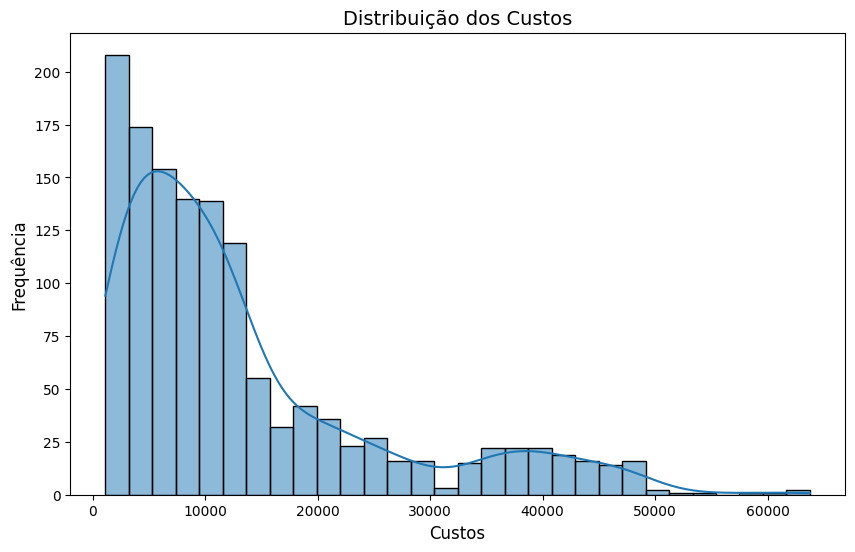

In [187]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(hspace=0.5)

ax = sns.histplot(data=df, x=df.charges, kde=True)
ax.set_title('Distribuição dos Custos', size=14)
ax.set_xlabel('Custos', size=12)
ax.set_ylabel('Frequência', size=12)
plt.show()

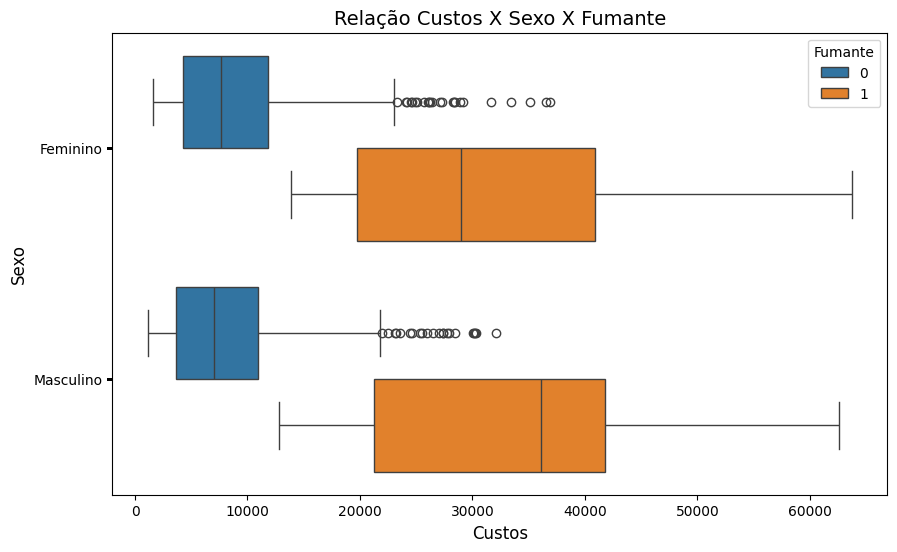

In [188]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(hspace=0.5)


ax = sns.boxplot(data=df, x='charges', y='sex', hue='smoker', orient='h')
ax.set_title('Relação Custos X Sexo X Fumante', size=14)
ax.set_xlabel('Custos', size=12)
ax.set_ylabel('Sexo', size=12)
sexo = ['Feminino', 'Masculino']
ax.set_yticklabels(sexo)
ax.set_yticks(df.sex)
ax.legend(title='Fumante')
plt.show()

#Os custos parecem não ter relação com gênero mas tem forte relação com individuos fumantes.

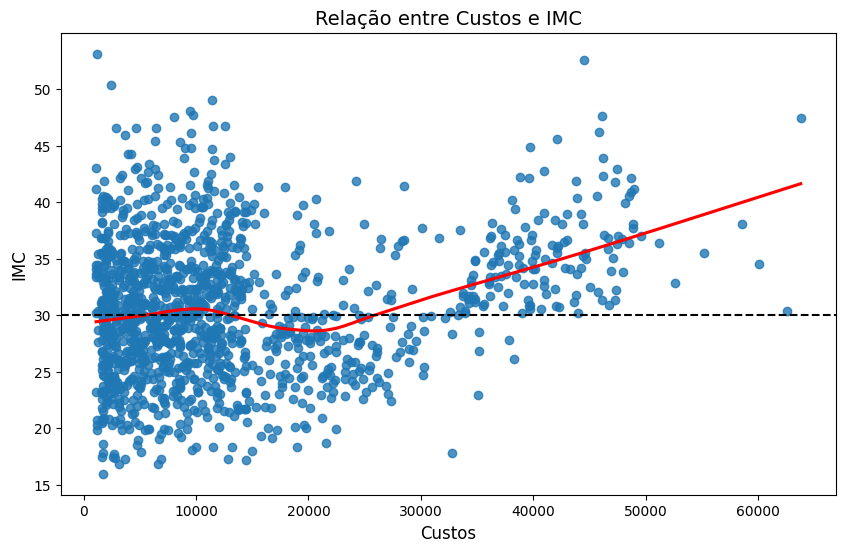

In [189]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(hspace=0.5)


ax = sns.regplot(data=df, x='charges', y='bmi', lowess=True, line_kws={'color': 'red'})
ax.set_title('Relação entre Custos e IMC', size=14)
ax.set_xlabel('Custos', size=12)
ax.set_ylabel('IMC', size=12)
ax.axhline(y=30, color='black', linestyle='--')
plt.show()

#Os individuos com Imc acima dos 30 tendem a ter um maior custo com o plano de saúde. Isso porque imc acima de 30 está assoiciado a obesidade, com isso os mesmos devem receber maior cuidado.

###Fonte: https://www.who.int/health-topics/obesity#tab=tab_1

In [190]:
num_criancas = df[df.children != 0].groupby('children')['charges'].mean()
num_criancas = num_criancas.reset_index()
num_criancas

,children,charges
0,1,12731.171832
1,2,15073.563734
2,3,15355.318367
3,4,13850.656311
4,5,8786.035247


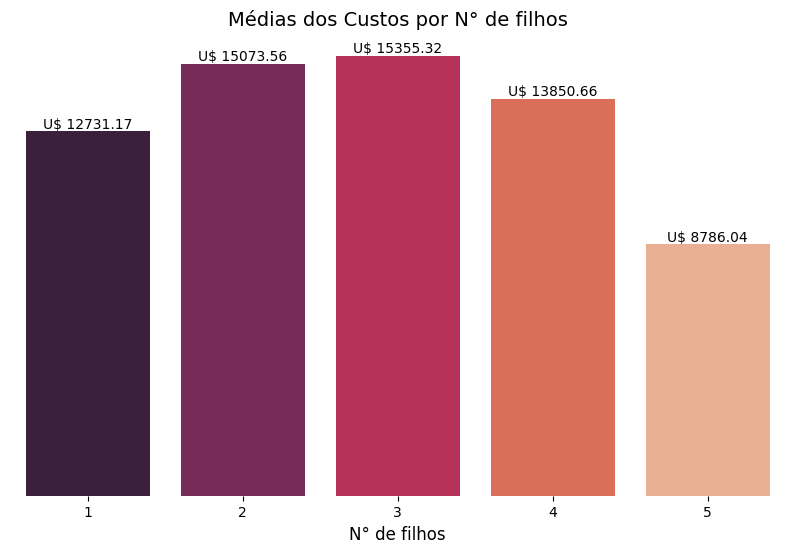

In [209]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(hspace=0.5)


ax = sns.barplot(data=num_criancas, x='children', y='charges', palette='rocket')
ax.set_title('Médias dos Custos por N° de filhos', size=14)
ax.set_xlabel('N° de filhos', size=12)
ax.set_yticks([])
ax.set_ylabel('')

for i, preco in enumerate(num_criancas['charges']):
  ax.text(x=i, y=preco, s=f'U$ {preco:.2f}', ha='center', va='bottom')
plt.box(False)
plt.show()

#Aqui vemos um aumento discreto dos custos para pessoas com mais filhos. Com execeção para aqueles com 4 e 5 filhos pois são menos frequentes nos dados.

In [192]:
regioes = df.groupby('region')['charges'].mean().reset_index()
regioes

,region,charges
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


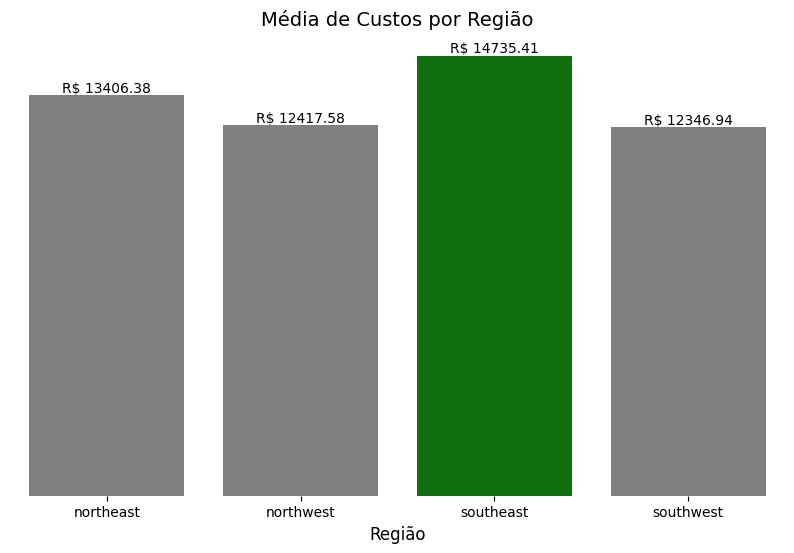

In [193]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(hspace=0.5)

cor = ['green' if i == 'southeast' else 'gray' for i in regioes['region']]
ax = sns.barplot(data=regioes, x='region', y='charges', palette=cor)
ax.set_title('Média de Custos por Região', size=14)
ax.set_xlabel('Região', size=12)
ax.set_yticks([])
ax.set_ylabel('')

for i, preco in enumerate(regioes['charges']):
  ax.text(x=i, y=preco, s=f'R$ {preco:.2f}', ha='center', va='bottom')
plt.box(False)
plt.show()

#Em média aqueles que moram mais próximos a região sudoeste dos EUA tendem a pagar um pouco mais caro pelos planos

In [194]:
df = pd.get_dummies(df, columns=['region'], dtype=int)

In [195]:
correlacao = df.corr()
correlacao

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


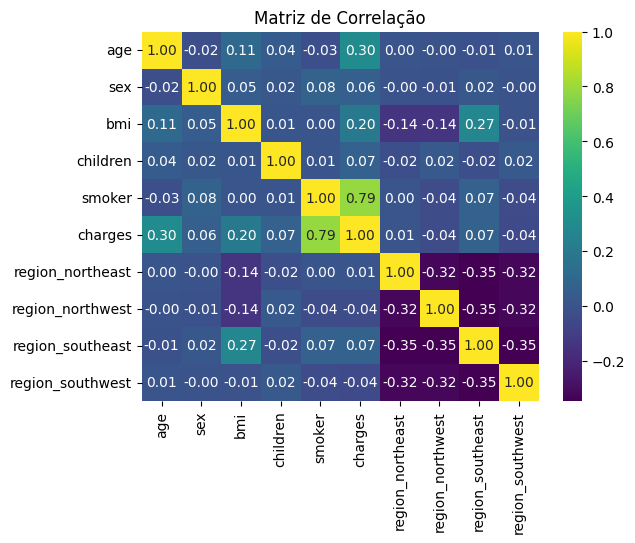

In [196]:
from matplotlib.colors import LinearSegmentedColormap

# cores = LinearSegmentedColormap.from_list("meu_mapa", ["gray", "red", "purple"])
sns.heatmap(correlacao, annot=True, cmap='viridis', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [197]:
X = df.drop('charges', axis=1)
y = df['charges']

#Escolhendo o melhor modelo

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=145)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_treino_scaled = scaler_X.fit_transform(X_treino)
X_teste_scaled = scaler_X.fit_transform(X_teste)

y_treino_scaled = scaler_y.fit_transform(y_treino.values.reshape(-1, 1))


modelo = LinearRegression()
modelo.fit(X_treino_scaled, y_treino_scaled)

y_pred_scaled = modelo.predict(X_teste_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
print(f'RMSE: {round(np.sqrt(mean_squared_error(y_teste, y_pred)), 2)}')
print(f'R2: {round(r2_score(y_teste, y_pred)*100, 2)}')

df_modelo1 = pd.DataFrame({'Charges': y_teste.round(2), 'Charges_pred': y_pred.flatten().round(2)})
df_modelo1.head()


RMSE: 6430.72
R2: 75.58


,Charges,Charges_pred
786,12741.17,15628.82
1006,4438.26,6070.88
1177,6496.89,7021.82
57,34303.17,25535.96
317,10435.07,12685.34


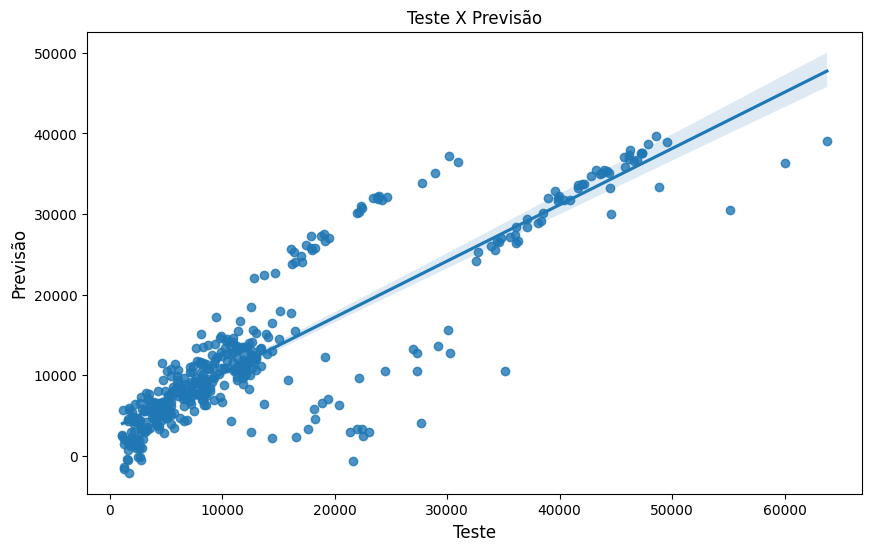

In [199]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(data=df_modelo1, x='Charges', y='Charges_pred')
ax.set_xlabel('Teste', size=12)
ax.set_ylabel('Previsão', size=12)
plt.title('Teste X Previsão')
plt.show()


In [200]:
from sklearn.ensemble import RandomForestRegressor
modelo2 = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=3)

modelo2.fit(X_treino_scaled, y_treino_scaled)
y_pred_rfr_scaled = modelo2.predict(X_teste_scaled)
y_pred_rfr = scaler_y.inverse_transform(y_pred_rfr_scaled.reshape(-1, 1))
print(f'RMSE: {round(np.sqrt(mean_squared_error(y_teste, y_pred_rfr)), 2)}')
print(f'R2: {round(r2_score(y_teste, y_pred_rfr)*100, 2)}')

df_modelo2 = pd.DataFrame({'Charges': y_teste.round(2), 'Charges_pred': y_pred_rfr.flatten().round(2)})
df_modelo2.head()

RMSE: 4654.51
R2: 87.21


,Charges,Charges_pred
786,12741.17,14945.36
1006,4438.26,6363.29
1177,6496.89,6486.81
57,34303.17,37881.94
317,10435.07,12378.34


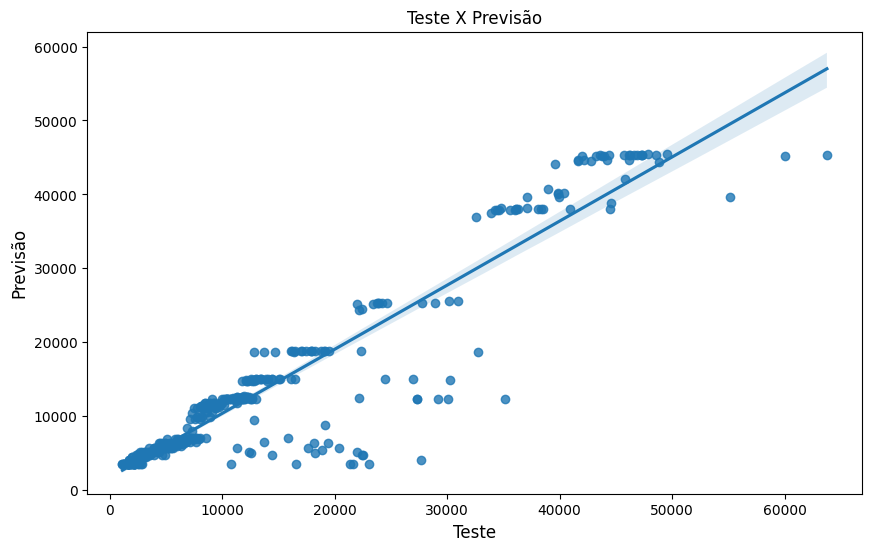

In [201]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(data=df_modelo2, x='Charges', y='Charges_pred')
ax.set_xlabel('Teste', size=12)
ax.set_ylabel('Previsão', size=12)
plt.title('Teste X Previsão')
plt.show()


In [208]:
import xgboost as xgb

modelo3 = xgb.XGBRegressor(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.5,
    colsample_bytree=0.5,
    random_state=42
)

modelo3.fit(X_treino, y_treino)

y_pred_xgb = modelo3.predict(X_teste)

print(f'RMSE: {round(np.sqrt(mean_squared_error(y_teste, y_pred_xgb)), 2)}')
print(f'R2: {round(r2_score(y_teste, y_pred_xgb)*100, 2)}')

df_modelo3 = pd.DataFrame({'Charges': y_teste.round(2), 'Charges_pred': y_pred_xgb.flatten().round(2)})
df_modelo3.head()

RMSE: 5171.5
R2: 84.21


,Charges,Charges_pred
786,12741.17,15771.150391
1006,4438.26,7569.759766
1177,6496.89,6984.229980
57,34303.17,33865.378906
317,10435.07,12165.870117


In [203]:
dtreino = xgb.DMatrix(X_treino, y_treino)
dteste = xgb.DMatrix(X_teste, y_teste)

In [204]:
params = {'objective': 'reg:squarederror'}

cv_resultados = xgb.cv(dtrain=dtreino, params=params, nfold=5, num_boost_round=1000,
                       early_stopping_rounds=10, metrics='rmse', as_pandas=True, seed=4789)

cv_resultados

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,8713.127796,48.080283,8831.427812,277.561894
1,6717.920389,27.188895,7008.323699,147.173256
2,5391.203716,12.312931,5921.636911,104.246686
3,4534.354454,22.388439,5309.788450,95.546460
4,3963.584070,27.671554,4971.969338,154.351445
5,3560.337494,44.596209,4834.954179,178.510964
6,3289.590960,40.578118,4754.066972,229.344049
7,3109.259077,35.882872,4723.344452,251.452074
8,2958.964644,35.093225,4712.732156,268.915394


In [205]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'colsample_bytree': [0.6, 0.8, 1],
    'subsample': [0.5, 0.8, 1],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

gbm = xgb.XGBRegressor(enable_categorical=True)

grid = GridSearchCV(
    estimator = gbm,
    param_grid = param_grid,
    scoring = 'neg_mean_squared_error',
    cv = 5,
    verbose = 1
)

grid.fit(X, y)

print('Melhores hiperparâmetros encontrados: ', grid.best_params_)
print('Menor RMSE encontrado: ', np.sqrt(np.abs(grid.best_score_)))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Melhores hiperparâmetros encontrados:  {'colsample_bytree': 1, 'max_depth': 2, 'subsample': 0.8}
Menor RMSE encontrado:  4595.11346373049


[0]	treino-rmse:11585.01596	teste-rmse:12944.29612
[100]	treino-rmse:6233.05218	teste-rmse:6857.91050
[200]	treino-rmse:4903.26598	teste-rmse:5310.60428
[300]	treino-rmse:4526.28122	teste-rmse:4911.73123
[400]	treino-rmse:4360.44018	teste-rmse:4786.79398
[500]	treino-rmse:4267.86099	teste-rmse:4741.10196
[530]	treino-rmse:4248.18956	teste-rmse:4735.97717
RMSE: 4735.80


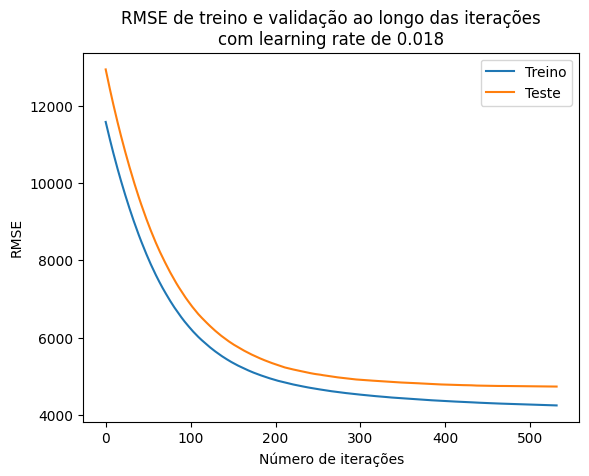

In [206]:
params = {'objective': 'reg:squarederror', 'colsample_bytree': 1, 'max_depth': 2, 'subsample': 0.8,
          'learning_rate': 0.01}


evals_result = {}

modelo_final = xgb.train(
    params=params,
    dtrain=dtreino,
    num_boost_round=1000,
    early_stopping_rounds=10,
    verbose_eval=100,
    evals=[(dtreino, 'treino'), (dteste, 'teste')],
    evals_result=evals_result
)
preds_f = modelo_final.predict(dteste)
rmse = mean_squared_error(dteste.get_label(), preds_f)
print(f'RMSE: {np.sqrt(rmse):.2f}')
treino_rmse = evals_result['treino']['rmse']
validacao_rmse = evals_result['teste']['rmse']

plt.plot(treino_rmse, label='Treino')
plt.plot(validacao_rmse, label='Teste')
plt.xlabel('Número de iterações')
plt.ylabel('RMSE')
plt.title('RMSE de treino e validação ao longo das iterações\ncom learning rate de 0.018')
plt.legend()
plt.show()

In [207]:
melhor_modelo = pd.DataFrame(
    {'Modelo1': [round(np.sqrt(mean_squared_error(y_teste, y_pred)), 2), round(r2_score(y_teste, y_pred)*100, 2)],
     'Modelo2': [round(np.sqrt(mean_squared_error(y_teste, y_pred_rfr)), 2), round(r2_score(y_teste, y_pred_rfr)*100, 2)],
     'Modelo_final': [round(np.sqrt(mean_squared_error(y_teste, preds_f)), 2), round(r2_score(y_teste, preds_f)*100, 2)]})
melhor_modelo.index = ['RMSE', 'R2']
melhor_modelo

,Modelo1,Modelo2,Modelo_final
RMSE,6430.72,4654.51,4735.80
R2,75.58,87.21,86.76
